In [1]:
import networkx as nx
from networkx.algorithms import isomorphism
import numpy as np
import matplotlib as plt
import os
import scipy.special

In [114]:
# Generate a dataset of random, simple, complete graphs
full_dataset_name = "full_graph_dataset"
num_nodes = 10
graphs_per_edge_number = 100

In [115]:
edge_num_low = num_nodes - 1  # Lowest number of edges (|V| - 1)
edge_num_hi = int(scipy.special.binom(num_nodes, 2))  # Highest number of edges (complete graph)
os.makedirs(full_dataset_name, exist_ok=True)
counter = 0
for i in range(edge_num_low, edge_num_hi):
    for j in range(graphs_per_edge_number):
        graph = nx.dense_gnm_random_graph(num_nodes, i)  # Generate a random simple graph
        if nx.is_connected(graph):  # Record the graph if it is connected
            for k in range(len(list(graph.degree))):  # Set node attribute to be node degree
                graph.nodes[k]['deg'] = list(graph.degree)[k][1]
            nx.write_gml(graph, full_dataset_name + "/graph." + "{:04d}".format(counter))  # Write graph to file
            counter += 1

In [116]:
# Generate a training dataset of graphs with deleted edges and corresponding subisomorphism targets
training_dataset_name = "training_graph_dataset"

In [117]:
os.makedirs(training_dataset_name, exist_ok=True)
for root, subfolders, files in os.walk(full_dataset_name):
    for f in files:
        path = os.path.join(root, f)  # File path of a graph
        graph_number = f[-4:]
        original_graph = nx.read_gml(path, destringizer=int)  # Read a graph from file
        new_graph = original_graph.copy()  # Make a copy of the graph 
        d = 0.2*np.random.uniform(0, 1) + 0.7*np.random.beta(3, 3)  # Random fraction of remaining edges
        num_deletions = int((1 - d)*(len(list(original_graph.edges))))  # Integer number of edges to delete 
        for _ in range(num_deletions):  # Delete edges from the graph
            num_edge_to_delete = np.random.randint(0, len(list(new_graph.edges)))
            new_graph.remove_edge(list(new_graph.edges)[num_edge_to_delete][0], list(new_graph.edges)[num_edge_to_delete][1])
        
        target = np.zeros([num_nodes, num_nodes])  # Target matrix showing subisomorphic edge additions as 1s
        test_graph = new_graph.copy()  # Make a copy of the new, deleted-edges graph
        for i in range(num_nodes):
            for j in range(num_nodes):
                if i < j and (i, j) not in new_graph.edges:
                    test_graph.add_edge(i, j)  # Try adding a new edge between nodes i and j and check if it is subisomorphic
                    if isomorphism.GraphMatcher(nx.line_graph(original_graph), nx.line_graph(test_graph)).subgraph_is_isomorphic():
                        target[i, j] = 1.0
                        target[j, i] = 1.0
                    test_graph = new_graph.copy()
        
        nx.write_gml(new_graph, training_dataset_name + "/partial_graph." + graph_number)
        np.savetxt(training_dataset_name + "/target." + graph_number, target)

KeyboardInterrupt: 

In [119]:
original_graph = nx.read_gml(full_dataset_name + "/graph.0280", destringizer=int)
partial_graph = nx.read_gml(training_dataset_name + "/partial_graph.0280", destringizer=int)
target = np.loadtxt(training_dataset_name + "/target.0280")

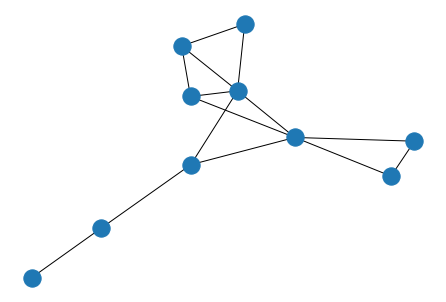

In [120]:
nx.draw(original_graph)

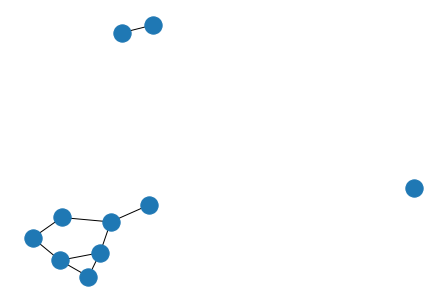

In [121]:
nx.draw(partial_graph)

In [122]:
print(target)
print(partial_graph.edges)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[(0, 4), (0, 7), (1, 9), (2, 8), (4, 7), (4, 8), (5, 6), (5, 7), (6, 8)]


In [135]:
test_graph = partial_graph.copy()
test_graph.add_edge(1, 7)
isomorphism.GraphMatcher(nx.line_graph(original_graph), nx.line_graph(test_graph)).subgraph_is_isomorphic()

False

In [3]:
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_edge(1, 2)
G1.add_edge(2, 3)
G1.add_edge(1, 3)
G1.add_node(5)
G2 = nx.Graph()
G2.add_node(1)
G2.add_node(2)
G2.add_node(3)
G2.add_edge(1, 2)
#G2.add_edge(2, 3)
#G2.add_edge(1, 3)
GM = isomorphism.GraphMatcher(G1,G2)

G1_lg = nx.line_graph(G1)
G2_lg = nx.line_graph(G2)
GM_lg = isomorphism.GraphMatcher(G1_lg, G2_lg)

In [4]:
print(GM.subgraph_is_isomorphic())
print(GM_lg.subgraph_is_isomorphic())

True
True


In [5]:
print(G1.nodes)
print(G1.edges)
print(G2.nodes)
print(G2.edges)

[1, 2, 3, 5]
[(1, 2), (1, 3), (2, 3)]
[1, 2, 3]
[(1, 2)]


In [47]:
test = GM.subgraph_isomorphisms_iter()

In [48]:
for i in test:
    print(i)

{1: 1, 2: 2, 3: 3}
{1: 1, 3: 2, 2: 3}
{2: 1, 1: 2, 3: 3}
{2: 1, 3: 2, 1: 3}
{3: 1, 1: 2, 2: 3}
{3: 1, 2: 2, 1: 3}


In [61]:
for i in range(2):
    for j in range(2):
        print(i, j)

0 0
0 1
1 0
1 1


In [188]:
np.random.beta(3, 3)

0.8249384083347897

In [204]:
d = 0.2*np.random.uniform(0, 1) + 0.7*np.random.beta(3, 3)

In [205]:
d

0.3681086056646489

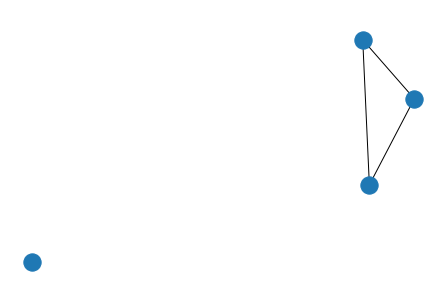

In [6]:
nx.draw(G1)

In [7]:
G1.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

In [8]:
G1.remove_edge(1, 2)

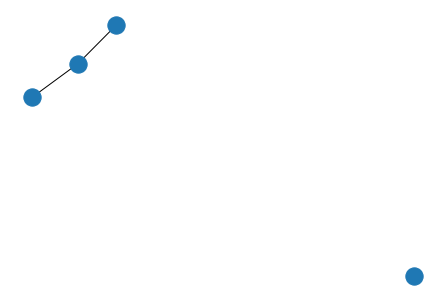

In [9]:
nx.draw(G1)

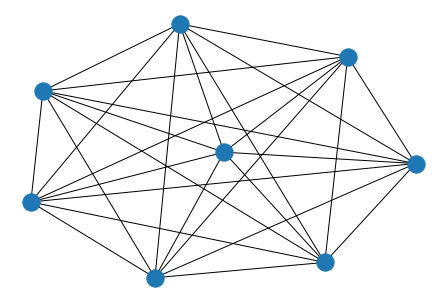

In [16]:
G3 = nx.complete_graph(8)
nx.draw(G3)

In [62]:
G3.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)])

In [ ]:
test = nx.random_degree_sequence_graph([3, 3, 3, 3])

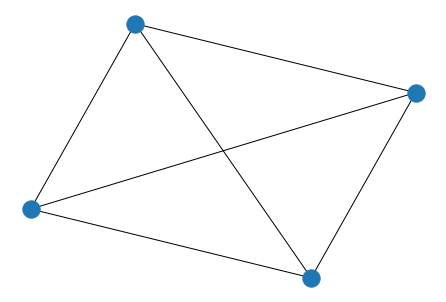

In [43]:
nx.draw(test)

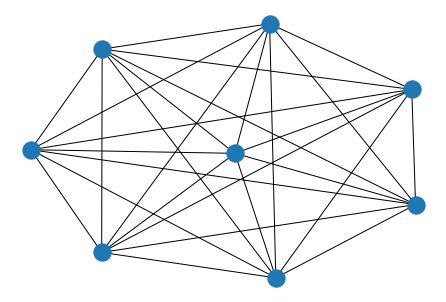

In [51]:
nx.draw(nx.fast_gnp_random_graph(8, 4))

In [111]:
a = np.random.randint(0, 2, size=(3, 3))
D = nx.Graph(a)

In [114]:
nx.to_numpy_matrix(D)

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [3]:
graph_list = []
for i in range(4, 11):
    for _ in range(10):
        test = nx.dense_gnm_random_graph(5, i)
        if nx.is_connected(test):
            graph_list.append(test)

In [243]:
nx.to_numpy_matrix(graph_list[5])

matrix([[0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 1.],
        [1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [244]:
nx.write_edgelist(graph_list[5], "test.edgelist")

In [288]:
g = nx.read_edgelist("test.edgelist", nodetype=int)

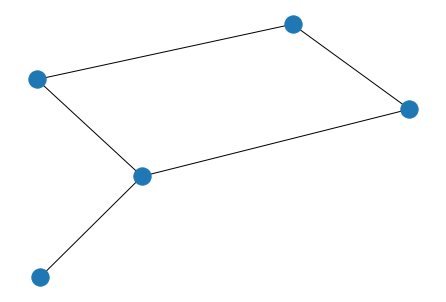

In [289]:
nx.draw(g)

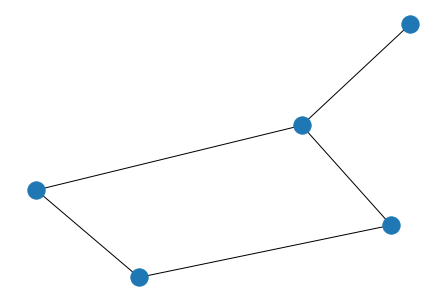

In [249]:
nx.draw(graph_list[5])

In [290]:
g.degree[0]

2

In [252]:
G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.degree[0]  # node 0 has degree 1
list(G.degree([0, 1, 2]))
[(0, 1), (1, 2), (2, 2)]

[(0, 1), (1, 2), (2, 2)]

In [258]:
list(g.degree)

('0', 2)

In [264]:
G.degree

DegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [265]:
g.degree

DegreeView({'0': 2, '1': 2, '3': 2, '2': 3, '4': 1})

In [276]:
ok = int(list(g.edges)[0][0]), int(list(g.edges)[0][1])

In [277]:
type(ok)

tuple

In [283]:
g.remove_edge('0', '1')

In [284]:
g.edges

EdgeView([('0', '3'), ('1', '2'), ('3', '2'), ('2', '4')])

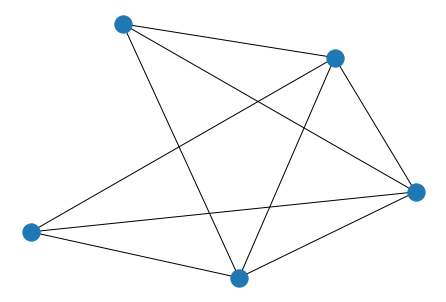

In [299]:
nx.draw(graph_list[50])

In [286]:
p = 1

In [300]:
graph_list[50].edges

EdgeView([(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [4]:
new_graph = graph_list[50].copy()
test_graph = new_graph.copy()

In [5]:
new_graph.remove_edge(list(new_graph.edges)[0][0], list(new_graph.edges)[0][1])

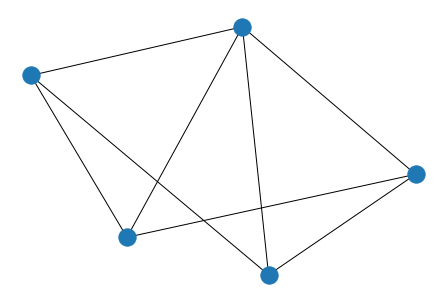

In [6]:
nx.draw(new_graph)

In [369]:
list(new_graph.degree)

[(0, 2), (1, 3), (2, 3), (3, 4), (4, 4)]

In [372]:
for i in range(len(list(new_graph.degree))):
    new_graph.nodes[i]['deg'] = list(new_graph.degree)[i][1]

In [379]:
nx.write_gml(new_graph, "test.edgelist")

In [397]:
r = nx.read_gml("test.edgelist", destringizer=int)

In [398]:
r.edges

EdgeView([(0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [348]:
nx.set_node_attributes(new_graph, b, 'test')

In [353]:
new_graph.nodes[1]

{'test': DegreeView({0: 2, 1: 3, 2: 3, 3: 4, 4: 4})}

In [355]:
isinstance(b, dict)

False

In [357]:
new_graph.nodes[0]['deg'] = 2

In [ ]:
new_graph.nodes[2]

In [7]:
new_graph.edges

EdgeView([(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4)])

In [8]:
graph_list[50].edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4)])

In [14]:
isomorphism.GraphMatcher(nx.line_graph(graph_list[50]), nx.line_graph(new_graph)).subgraph_is_isomorphic()

True

In [28]:
test_graph = new_graph.copy()
y = np.zeros([5, 5])
for i in range(5):
    for j in range(5):
        if i != j and (i, j) not in new_graph.edges:
            test_graph.add_edge(i, j)
            if isomorphism.GraphMatcher(nx.line_graph(graph_list[50]), nx.line_graph(test_graph)).subgraph_is_isomorphic():
                y[i, j] = 1.0
            test_graph = new_graph.copy()

In [21]:
new_graph.edges

EdgeView([(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)])

In [30]:
np.savetxt("test.txt", y)

In [33]:
np.loadtxt("test.txt")

array([[0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])